# Поиск аномалий

## Цель занятия

В этом занятии мы разберём, как с помощью визуализаций выявлять аномалии в данных. Для поиска аномалий мы будем использовать алгоритмы обучения с учителем (Isolation Forest, KNN, SVM, Random Forest, AdaBoost, Gradient Boosting, Decision Trees), без учителя (DBSCAN, GMM, Spectral Clustering, Spectral Clustering, Local Outlier Factor, Isolation Kernel, Elliptic Envelope, HBOS) и нейросети для обоих случаев.

#1. Введение в аномалии

**Что такое аномалии?**

Аномалии в контексте машинного обучения представляют собой необычные или редкие события, данные или образцы, которые существенно отличаются от обычного паттерна или нормального поведения в наборе данных. Они могут указывать на потенциальные проблемы, ошибки, атаки или другие важные явления, которые требуют внимания и анализа. Обычно аномалии возникают либо в результате ошибок при создании датасета, либо в случае возникновения экстремальных (редких) событий. Давайте введем определение, с которым будем работать в рамках данного модуля:

**Аномалии в машинном обучении** – это отклонения от стандартного или ожидаемого поведения в данных, которые могут свидетельствовать о важных событиях или проблемах. Эти отклонения могут проявляться как выбросы, аномальные образцы или необычные паттерны, и требуют особого внимания алгоритмов машинного обучения для их выявления и классификации.

Если визуализировать аномалии на временном ряду, то можно выделить следующие виды аномалий:



<img src="https://github.com/ElijahSum/mipt_visualization/raw/master/week_04_visualization/data/1%20picture.webp"
     alt="Anomaly Type 1"
     style="float: left; margin-left: 5px;"
     width="335"/>
<img src="https://github.com/ElijahSum/mipt_visualization/raw/master/week_04_visualization/data/2%20picture.webp"
     alt="Anomaly Type 2"
     style="float: left; margin-left: 5px;"
     width="335"/>
<img src="https://github.com/ElijahSum/mipt_visualization/raw/master/week_04_visualization/data/3%20picture.webp"
     alt="Anomaly Type 3"
     style="float: left; margin-left: 5px;"
     width="335"/>
Источник: [Medium](https://medium.com/@jelkhoury880/introduction-to-anomaly-detection-methods-part-i-b1a2f389ffcb)


Ранее мы также говорили о **выбросах** в данных. Если сравнивать эти два понятия - выбросы и аномалии, то стоит заметить, что выбросы являются частным случаем аномалий. Такой пример выброса продемонстрирован на 3 картинке. В то же время, какой-то фрагмент данных может не отличаться статистически значимо от других данных, то быть очевидной аномалией (первая и вторая картинки).

**Как работать с выбросами?**

Существует несколько групп методов работы с аномалиями:

1. **Статистические методы** (эти методы мы обсуждали в предыдущих модулях):
   - **Z-оценка**: Оценка отклонения точек данных от среднего значения в стандартных отклонениях.
   - **Метод квантилей**: Определение аномалий на основе распределения квантилей данных.
2. **Методы машинного обучения**:
   - **Методы без учителя (Unsupervised Learning)**: Кластеризация или методы детекции выбросов, такие как One-Class SVM, Isolation Forest, или методы на основе автоэнкодеров.
   - **Методы с учителем (Supervised Learning)**: Использование классификационных моделей с учителем для обучения на нормальных и аномальных данных.
3. **Глубокое обучение (зачастую являются частью Supervised/Unsupervised Learning)**:
   - **Автоэнкодеры**: Нейронные сети, способные выделять важные признаки и восстанавливать входные данные, что делает их эффективными для обнаружения аномалий.
   - **Генеративные модели**: Использование генеративных моделей, таких как Generative Adversarial Networks (GAN), для моделирования нормального распределения данных и выявления аномалий.
4. **Комбинированные методы**:
   - **Интеграция различных подходов**: Использование комбинации различных методов для повышения эффективности обнаружения аномалий.

В данном модуле мы сконцентрируемся на применении методов обучения с учителем (Supervised Learning) и без учителя (Unsupervised Learning). Как и ранее, для того, чтобы лучше интерпретировать качество полученных нами моделей, мы будем использовать методы визуализации. Методы визуализации играют важную роль в работе с алгоритмами поиска аномалий, поскольку они помогают в понимании и интерпретации результатов алгоритмов, а также облегчают процесс выявления аномалий. Методы визуализации могут быть полезны при работе с алгоритмами поиска аномалий при отображении данных, построении кривых обучения и тепловых карт, визуализации результатов алгоритмов.

В целом, визуализация делает процесс обнаружения аномалий более доступным и интуитивно понятным, что позволяет эффективнее интерпретировать результаты алгоритмов и принимать информированные решения относительно выявленных аномалий. Обычно в рамках работы с подобными алгоритмами нам понадобится `scatter plot`.

Давайте начнем наш модуль с обзора самых распространенных методов обучения с учителем.

#2. **Методы обучения с учителем (Supervised Learning)**

Основная проблема, которую можно выделить в рамках работы с подобными алгоритмами - они подходят для разных задач. Обычно, можно примерно представить какой алгоритм пригодится для решения конкретно этой задачи. Для этого необходимо на глубоком уровне понимать принципы работы каждого алгоритма.

Я предлагаю Вам подробнее ознакомиться с внутренним устройством каждого алгоритма с помощью сторонних ресурсов.

Поскольку универсальных алгоритмов на текущем этапе еще не вывели, рассмотрим наиболее популярные, которые помогут Вам в работе.

## **Isolation Forest**
Простой, но эффективный подход к обнаружению аномалий.

Это ансамблевый метод, который изолирует аномалии путем построения случайных лесов и выделения точек данных, для выделения которых требуется наименьшее количество разделений в дереве. Таким образом, наиболее далекие и отдельностоящие точки будут изолироваться.

Посмотрите на результат работы алгоритма на случайно созданных данных:

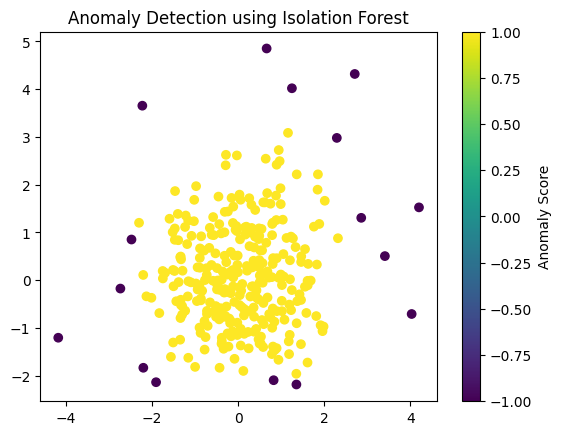

Detected anomalies: [ 27  48  54 127 150 163 182 206 245 300 301 303 304 305 306 307]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

normal_data = np.random.randn(300, 2)
anomalies = 2 + 1.5 * np.random.randn(10, 2)

data = np.vstack([normal_data, anomalies])

clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(data)

predictions = clf.predict(data)

plt.scatter(data[:, 1], data[:, 0], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)

Как мы видим, мы создали массив с 10 выбросами, а алгоритм обнаружил 16 выбросов. Однако можно понять, почему так произошло - шесть точек находятся снизу и слева от остального разброса, причем находятся достаточно удаленно от других точек. Поэтому мы можем сделать вывод о том что алгоритм в таком случае работает с достаточно хорошим качеством.

## **k-Nearest Neighbors (KNN)**

Один из самых распространенных алгоритмов в машинном обучении, который также можно использовать для обнаружения выбросов.

KNN может быть адаптирован для обнаружения аномалий, используя расстояние до k-го ближайшего соседа в качестве меры аномалии. Он классифицирует точки данных как аномалии, если они существенно отличаются от своих k-ближайших соседей.

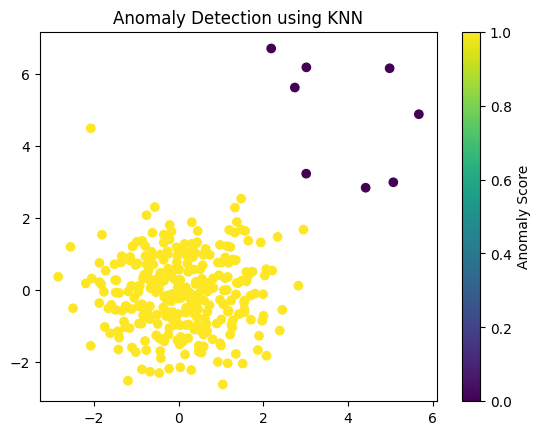

Detected anomalies: [300 302 303 304 305 307 308 309]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)

data = np.vstack([normal_data, anomalies])

labels = np.concatenate([np.ones(len(normal_data)), np.zeros(len(anomalies))])

k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

predictions = clf.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

В нашем случае алгоритм заспознал 8 из 10 точек, являющихся аномалиями. При чем, ни одного False Positive срабатывания. Неплохой результат!

## **One-Class SVM (Support Vector Machine)**

Одноклассовый SVM - это алгоритм обучения с учителем, который учится отличать класс большинства (нормальный) от класса меньшинства (аномалии). Он создает гиперплоскость, которая отделяет нормальные точки данных от потенциальных выбросов.

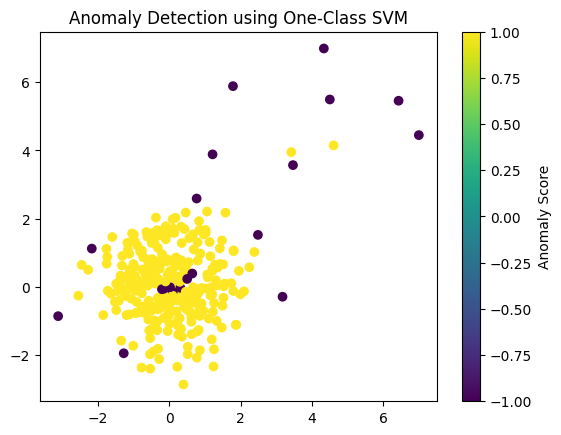

Detected anomalies: [ 62 103 127 175 180 201 221 224 230 235 254 294 300 302 304 305 306 307
 308 309]


In [ ]:
from sklearn.svm import OneClassSVM

normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)

data = np.vstack([normal_data, anomalies])

clf = OneClassSVM(nu=0.05, kernel="rbf")
clf.fit(data)

predictions = clf.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using One-Class SVM")
plt.show()

anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)

Как мы видим, в нашем случае алгоритм сработал достаточно плохо. Именно для обнаружения подобных случаев мы и используем `scatter plot`. Интересно, что алгоритм сработал настолько плохо, что распознал выбросы в точках прямов в центре распределения.

## **Менее распространенные алгоритмы обучения с учителем для детекции аномалий**

Давайте также разберем менее распространенные алгоритмы и рассмотрим их эффективность.

1. **Случайный лес:** Хотя случайные леса часто используются для задач классификации, их также можно использовать для контролируемого обнаружения аномалий, рассматривая один класс как аномалии, а другой - как обычные данные.
2. **Ансамблевые методы:** Алгоритмы AdaBoost (Adaptive Boosting) и Gradient Boosting являются двумя популярными методами построения ансамблей, которые объединяют несколько слабых учеников (обычно деревьев решений) для создания более сильной модели. Оба алгоритма следуют принципу последовательного обучения, но они различаются в том, как они обрабатывают ошибки и обновляют веса образцов.
3. **Деревья решений:** Деревья решений могут быть адаптированы для контролируемого обнаружения аномалий путем обучения дерева классификации точек данных как нормальных или аномальных в зависимости от их характеристик.

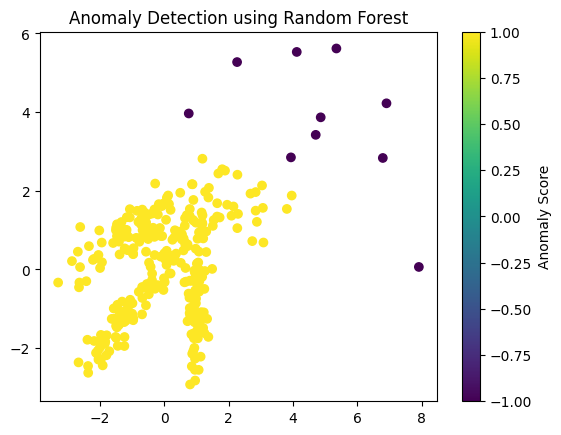

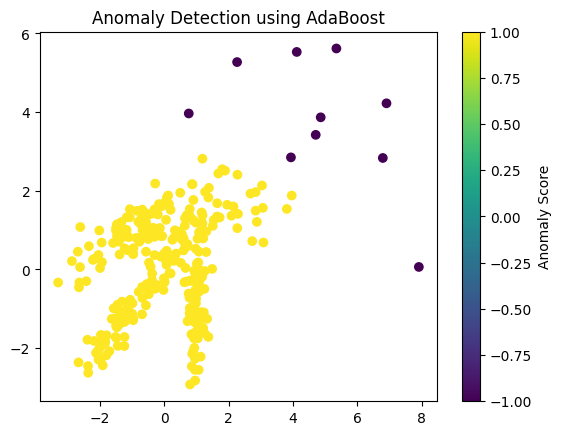

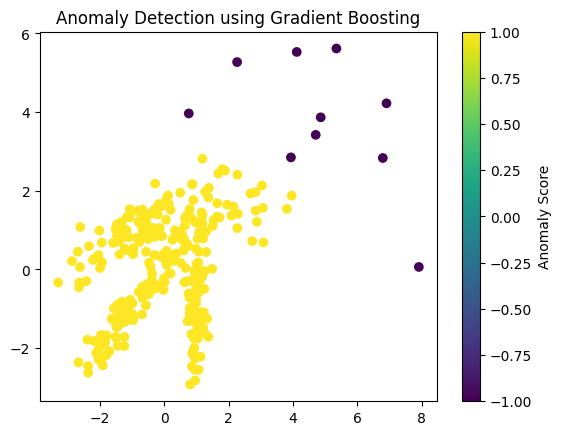

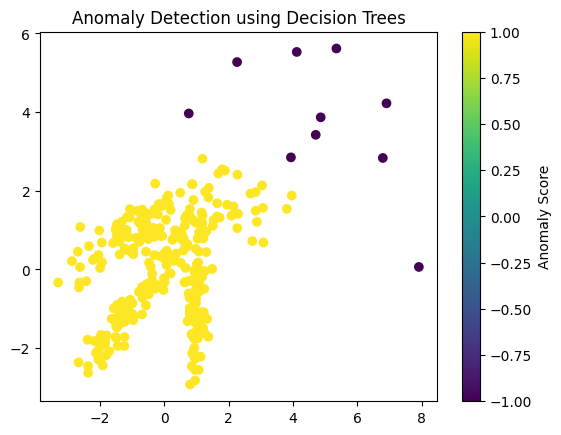

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from scipy.stats import norm


normal_data, _ = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0)
anomalies = np.random.randn(10, 2) * 1.5 + np.array([4, 4])
data = np.vstack([normal_data, anomalies])

labels = np.array([1] * len(normal_data) + [-1] * len(anomalies))

# Random Forest classifier
rf = RandomForestClassifier(n_estimators=150)
rf.fit(data, labels)
rf_predictions = rf.predict(data)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(data, labels)
ada_predictions = ada.predict(data)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=150)
gb.fit(data, labels)
gb_predictions = gb.predict(data)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(data, labels)
dt_predictions = dt.predict(data)

def plot_anomaly_detection_results(predictions, title):
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
    plt.colorbar(label="Anomaly Score")
    plt.title(title)
    plt.show()

plot_anomaly_detection_results(rf_predictions, "Anomaly Detection using Random Forest")
plot_anomaly_detection_results(ada_predictions, "Anomaly Detection using AdaBoost")
plot_anomaly_detection_results(gb_predictions, "Anomaly Detection using Gradient Boosting")
plot_anomaly_detection_results(dt_predictions, "Anomaly Detection using Decision Trees")

Все алгоритмы сработали неплохо в нашем случае. Однако простейший KNN показал более точные результаты. В рамках решения других задач ситуация может быть совершенно другой. Поэтому важно понимать какой алгоритм лучше использовать в зависимости от ситуации. Определить это может помочь наша любимая визуализация, а конкретно -  `scatter plot`. Именно с помощью построения первичной визуализации можно легко понять какой алгоритм лучше использовать в конкретной ситуации. Если речь идет о работе с выбросами во временном ряду (как было продемонстрировано на картинке выше), то можно применить `line plot`.

В случае если аномалия является по своей сути выбросом, то можно использовать `hist plot` и хорошо известный нам `box plot`.

## Использование нейросетей для детекции аномалий

Давайте представим, что в наши данные, согласно определенному правилу, были добавлены аномалии. Мы можем использовать нейросети для обнаружения этих аномалий. После использования нейросети мы создадим визуализацию чтобы оценить качество классификации.

4/4 [==============================] - 0s 5ms/step
Model: Neural Network
Confusion Matrix:
[[54  5]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        59
         1.0       0.90      1.00      0.95        43

    accuracy                           0.95       102
   macro avg       0.95      0.96      0.95       102
weighted avg       0.96      0.95      0.95       102



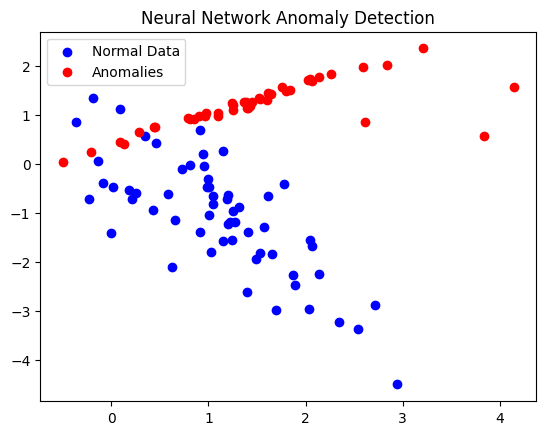

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

np.random.seed(42)
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
anomalies = 2 + 2.5 * np.random.randn(10, 2)
X = np.vstack([X, anomalies])
y = np.hstack([y, np.ones(len(anomalies))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_model = Sequential()
nn_model.add(Dense(8, input_dim=2, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_nn_pred = nn_model.predict(X_test)
y_nn_pred = (y_nn_pred > 0.5).astype(int)

print("Model: Neural Network")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_nn_pred))
print("Classification Report:")
print(classification_report(y_test, y_nn_pred))
print("="*50)

plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', label='Normal Data')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', label='Anomalies')
plt.title('Neural Network Anomaly Detection')
plt.legend()
plt.show()

Как вы можете видеть, такой способ обнаружения аномалий является наиболее продвинутым, поскольку позволяет обнаружить "закон" в соответствии с которым были добавлены аномалии. А исходя из этого уже выделить особо подозрительные точки.

#3. **Методы обучения без учителя (Unsupervised Learning)**

## **Density-Based Approaches (DBSCAN)**

DBSCAN особенно эффективен при идентификации кластеров точек данных в местах с высокой плотностью данных, в то время как точки данных в регионах с низкой плотностью помечаются как аномалии или шум. Он работает на основе концепции плотности данных, что делает его устойчивым к кластерам неправильной формы и способным обрабатывать наборы данных с различными размерами кластеров. Вот как работает DBSCAN в библиотеке sklearn:

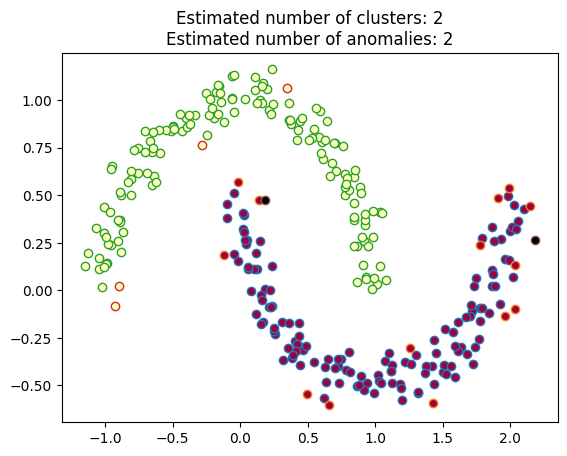

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.07, random_state=42)

dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

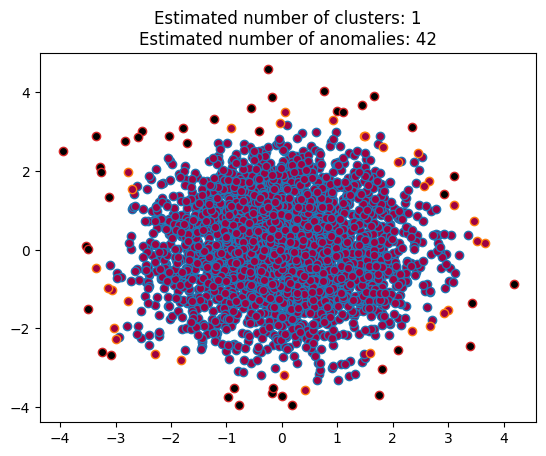

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=3000, noise=1, random_state=42)

dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

Как вы видите, алгоритм делит наши данные не на два класса (нормальные данные и выбросы), а на большее количество. Черным цветом помечены точки, которые идентифицированы алгоритмом однозначно как выбросы. Красные и зеленоватые точки - те, в работе которых алгоритм сомневается.

## **Gaussian Mixture Models (GMM)**

GMM широко используются для задач кластеризации и оценки плотности, но они также могут быть применены для обнаружения аномалий путем идентификации точек данных с низкой вероятностью в рамках смоделированного распределения. Ниже находится пример того, как GMMs работают для обнаружения аномалий с использованием функции GaussianMixture из библиотеки scikit-learn.

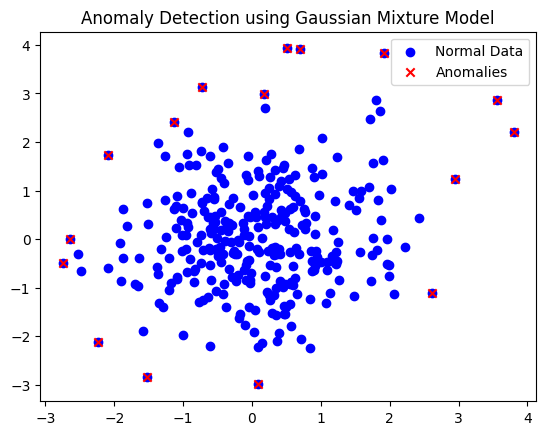

In [ ]:
from sklearn.mixture import GaussianMixture

normal_data = np.random.randn(300, 2)
anomalies = 2 + 1.5 * np.random.randn(10, 2)

data = np.vstack([normal_data, anomalies])

n_components = 5
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(data)

likelihoods = -gmm.score_samples(data)
threshold = np.percentile(likelihoods, 95)

anomalies_indices = np.where(likelihoods > threshold)[0]

plt.scatter(data[:, 0], data[:, 1], c='b', label='Normal Data')
plt.scatter(data[anomalies_indices, 0], data[anomalies_indices, 1], c='r', marker='x', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection using Gaussian Mixture Model')
plt.show()

Опять же использование визуализации в нашем случае позволяет сделать однозначный вывод о том, насколько хорошо работает алгоритм. В данном случае алгоритм себя показал наилучшим образом - в рамках решения нашей задачи можно использовать его.

## **Использование нейросети при детекции аномалии без учителя**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

np.random.seed(42)
normal_data = np.random.randn(300, 10)
anomalies = 2 + 1.5 * np.random.randn(10, 10)

data = np.vstack([normal_data, anomalies])

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = data.shape[1]
encoding_dim = 5
autoencoder = Autoencoder(input_dim, encoding_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

data_tensor = torch.Tensor(data)

num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = autoencoder(data_tensor)
    loss = criterion(outputs, data_tensor)
    loss.backward()
    optimizer.step()

reconstructed_data = autoencoder(data_tensor).detach().numpy()
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)

threshold = np.percentile(reconstruction_errors, 97)

anomalies_indices = np.where(reconstruction_errors > threshold)[0]
print("Detected anomalies:", anomalies_indices)

Detected anomalies: [159 300 301 302 303 304 306 307 308 309]


Алгоритм обнаружил все выбросы, которые мы добавили в данные (точки 300-309), однако также произошло 6 False Positive срабатываний.

## **Прочие алгоритмы детекции аномалий с помощью обучения без учителя**

Давайте рассмотрим другие популярные алгоритмы обучения без учителя:


1. **Spectral Clustering** (Спектральная кластеризация) -  является методом кластеризации данных, основанным на спектральных свойствах матрицы аффинности между точками данных. Она применяется для выделения структуры в данных и может быть использована для выявления аномалий, так как аномальные точки могут формировать отдельные кластеры.
2. **Local Outlier Factor** - метод, используемый для измерения степени аномалий точек данных на основе их локального окружения. Он вычисляет отклонение наблюдаемой точки от своих соседей, что позволяет выявлять аномалии, отличающиеся от своего ближайшего окружения.
3. **Isolation Kernel** - метод, который основан на изоляции аномальных наблюдений от нормальных. Он строит модель, изолируя аномальные точки, и затем использует эту модель для идентификации новых аномалий.
4. **Elliptic Envelope** - метод, который моделирует нормальное распределение данных, предполагая, что оно подчиняется многомерной эллиптической форме. Точки, расположенные далеко от этой эллиптической формы, могут быть считаны аномалиями.
5. **HBOS** (Histogram-based Outlier Score) - метод, основанный на построении гистограмм для каждого признака данных и вычислении "очков выбросов" на основе вероятности аномальности каждой точки. Этот метод эффективен и вычислительно доступен, особенно для данных с большим числом признаков.

Для использования метода `HBOS` воспользуемся библиотекой `pyod`, поскольку его нет в стандартной библиотеке `sklearn`.  

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=f0e073136f1f242644e79722e61f42a41190064d2950b543bb207e9629632f13
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


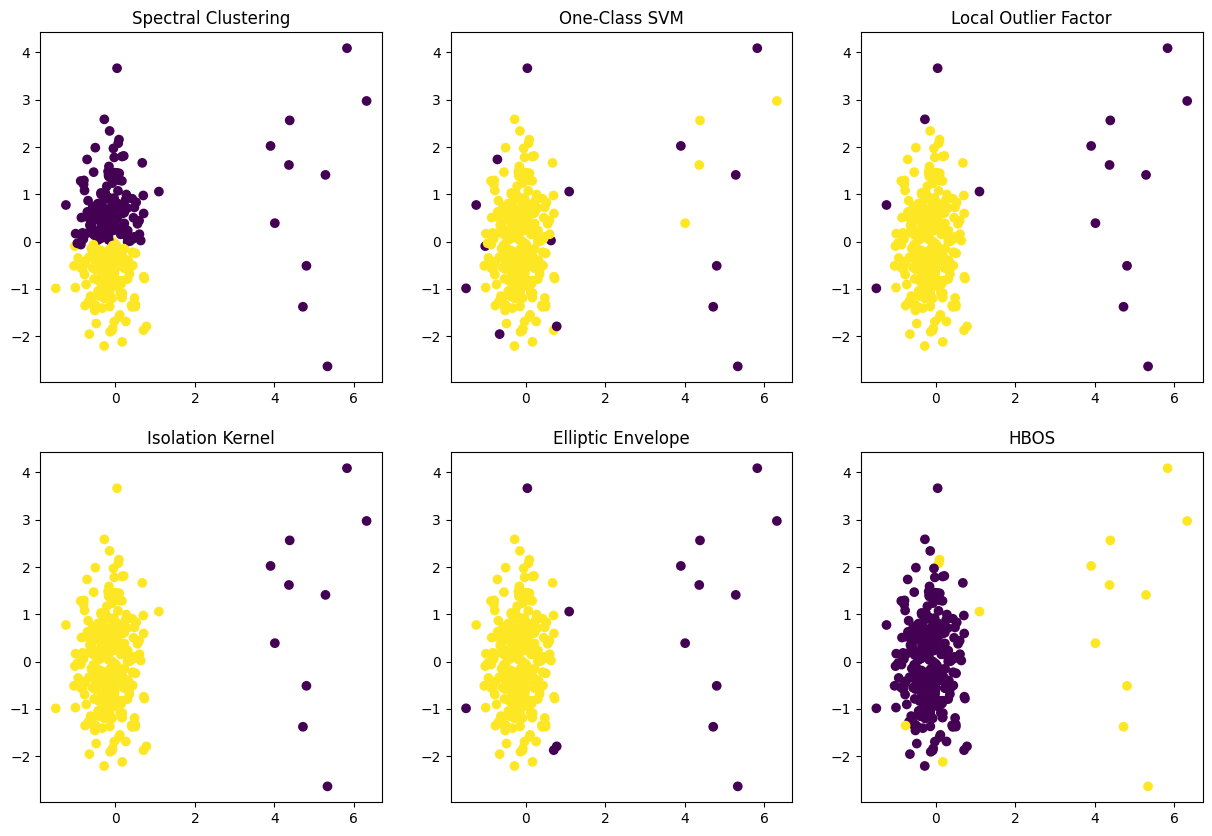

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from pyod.models.hbos import HBOS

n_samples = 300
n_features = 2
n_outliers = 10

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, random_state=42)
X[:n_outliers] = 10 + 2 * np.random.randn(n_outliers, n_features)

scaler = StandardScaler()
X = scaler.fit_transform(X)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
spectral.fit(X)
labels_spectral = spectral.labels_
axs[0, 0].scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis')
axs[0, 0].set_title("Spectral Clustering")

# One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel="rbf")
ocsvm.fit(X)
labels_ocsvm = ocsvm.predict(X)
axs[0, 1].scatter(X[:, 0], X[:, 1], c=labels_ocsvm, cmap='viridis')
axs[0, 1].set_title("One-Class SVM")

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels_lof = lof.fit_predict(X)
axs[0, 2].scatter(X[:, 0], X[:, 1], c=labels_lof, cmap='viridis')
axs[0, 2].set_title("Local Outlier Factor")

# Isolation Kernel
kernel = KMeans(n_clusters=2, random_state=42)
kernel.fit(X)
labels_kernel, _ = pairwise_distances_argmin_min(X, kernel.cluster_centers_)
axs[1, 0].scatter(X[:, 0], X[:, 1], c=labels_kernel, cmap='viridis')
axs[1, 0].set_title("Isolation Kernel")

# Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.05)
labels_elliptic = elliptic.fit_predict(X)
axs[1, 1].scatter(X[:, 0], X[:, 1], c=labels_elliptic, cmap='viridis')
axs[1, 1].set_title("Elliptic Envelope")

# HBOS
hbos = HBOS(contamination=0.05)
labels_hbos = hbos.fit_predict(X)
axs[1, 2].scatter(X[:, 0], X[:, 1], c=labels_hbos, cmap='viridis')
axs[1, 2].set_title("HBOS")

plt.show()

Как мы видим, в нашем случае не все алгоритмы показали себя одинаково хорошо. Наиболее эффективными оказались `Isolation Kernel` и `Elliptic Envelope`. Также с некоторыми оговорками хорошо сработал `HBOS`.

Наиболее забавными получились результаты `Spectral Clustering`. Спасибо алгоритму за сделанный день.

# 4. **Заключение**

Итак, мы познакомились с основными алгоритмами идентификации аномалий и способами использования визуализации в рамках этого процесса. Однако, сейчас мы занимались в основном визуализацией в двумерном пространстве. Хотя, когда мы работаем с аномалиями, мы обычно сталкиваемся с большим количеством измерений.

Как ни странно, даже работая с огромным числом измерений можно использовать визуализацию, которая позволит лучше понимать что происходит в данных. Для этого нам могут прийти на помощь *алгоритмы снижения размерности*. На них мы и сосредоточимся в следующем модуле.

Что мы узнали в результате этого модуля:
1. Введение в аномалии
   - **Аномалии**  - необычные или редкие события, которые существенно отличаются от обычного паттерна или нормального поведения в наборе данных.
   - Детекцию аномалий можно проводить с помощью статистических методов, методов ML и Deep Learning, а также комбинации разных подходов.
   - В рамках работы с аномалиями очень удобно использовать визуализацию для того чтобы лучше понимать что происходит в данных. Наиболее часто мы используем с этой целью `scatter plot`. Реже - `line plot`, `hist plot`, `box plot`.
2. Методы обучения с учителем для идентификации аномалий
   - Самые популярные методы доступны в библиотеке `sklearn`.
   - Наиболее часто из методов обучения с учителем используются `Isolation Forest`, `KNN`, `One-Class SVM`. Все эти алгоритмы работают разными способами и подходят под разные радачи.
   - Другие, менее популярные методы также показывают неплохие результаты (`AdaBoost`, `Gradient Boosting`, `Random Forest`, `Decision Trees`).
   - Наиболее продвинутым способом идентификации аномалий является создание нейросети. Правильно обученная нейросеть способна идентифицировать закон, по которому выбросы добавлены в данные и избавиться от них.
3. Методы обучения без учителя
   - Метод `DBSCAN` делит данные не на два кластера (выбросы и нормальные данные), а также идентифицирует "проблемную зону" - значения, которые не удается точно разметить, часть из них может не являться аномалиями.
   - В рамках нашего анализа наиболее эффективным оказался алгоритм семейства `GMM`. А вот нейросетевой алгоритм показал ниже качество.
  - Рассмотренные нами прочие алгоритмы (`Spectral Clustering`, `One-Class SVM`, `Local Outlier Factor`, `Isolation Kernel`, `Elliptic Envelope`, `HBOS`) также могут использоваться в анализе, однако они не универсальны и подходят не под все данные. Перед окончательным использование алгоритма необходимо убедиться в корректности его работы. В нашем случае себя хорошо показали `Isolation Kernel`, `Elliptic Envelope`, `HBOS`.